## Import the library and read the data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In this part, I only focus on multiple choice responses so I import it. The rate file will be used later to caculate the salary.

In [3]:
fx_rates = pd.read_csv('conversionRates.csv', encoding = "ISO-8859-1", low_memory = False)
df = pd.read_csv('multipleChoiceResponses.csv', encoding = "ISO-8859-1", low_memory = False)

In [4]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Define functions to deal with multiple value or column

First of all, I'll write function to deal with multiple value and multiple columns response.

In [5]:
def total_count(df):
    '''
    This function receives a column with multiple values separated by a comma. 
    It counts the number of occurrences of each value in the column.
    
    INPUT:
    df - the pandas dataframe contain multiple values
    
    OUTPUT:
    new_df - a dataframe of each value with the count of how often it shows up 
    '''
    new_df = df.str.split(',')
    new_df_set=[]
    for i in new_df.dropna():
        new_df_set.extend(i)
    new_df = pd.Series(new_df_set).value_counts().sort_values(ascending = False).to_frame()
    return new_df

In [6]:
def count_multi_col(df, colname, delcol=[]):
    '''
    This function searches for all columns in the data that contain a particular string. 
    These columns have to have the same range.
    Function calculates the number of each value in each column. 
    And then it calculates the proportion of each column.
    
    INPUT:
    df - the pandas dataframe contain multiple columns to extract
    colname - a string as the prefix of columns names to be extracted
    delcol - a list contains colnames to be removed
    
    OUTPUT:
    new_df - a dataframe of each value with the ratio of this option be selected 
    '''

    target_features = [x for x in df.columns if x.find(colname) != -1]
    if len(delcol) != 0:
        for col in delcol:
            target_features.remove(col)
            
    new_df_dict = {}
    for feature in target_features:
        feature_value = df[feature].value_counts()
        feature_value_ratio = feature_value / feature_value.sum()
        new_df_dict[feature[len(colname):]] = feature_value_ratio        
    new_df = pd.DataFrame(new_df_dict).transpose()
    return new_df

## Plot learning platform and learning platform usefulness  

Let's see what learning platform we can choose and how useful they are.

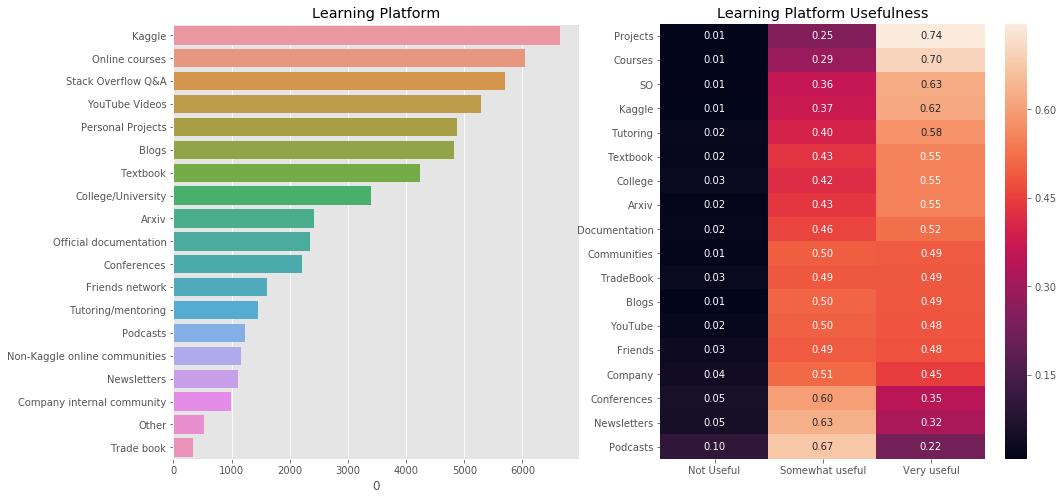

In [7]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))

learn_platform_plt = total_count(df['LearningPlatformSelect'])
sns.barplot(learn_platform_plt[0], learn_platform_plt.index, ax = ax[0])
ax[0].set_title('Learning Platform')


LP_usefulness = count_multi_col(df, 'LearningPlatformUsefulness')
LP_usefulness = LP_usefulness.sort_values('Very useful', ascending = False)
sns.heatmap(LP_usefulness, ax = ax[1], annot = True, fmt = ".2f")
ax[1].set_title('Learning Platform Usefulness')


plt.show()

## Plot course platform and blogs etc.

Let's see what specific choices do we have in the courses, blogs, podcasts and newsletters.

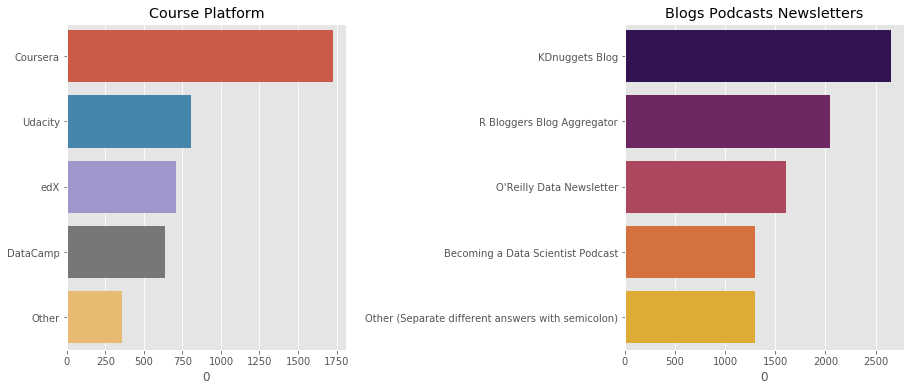

In [8]:
f, ax = plt.subplots(1, 2, figsize = (15, 6))

learn_platform_plt = total_count(df['CoursePlatformSelect'])
sns.barplot(learn_platform_plt[0], learn_platform_plt.index, ax = ax[0])
ax[0].set_title('Course Platform')

BPN_plt = total_count(df['BlogsPodcastsNewslettersSelect'])
BPN_plt = BPN_plt.iloc[:5]
sns.barplot(BPN_plt[0], BPN_plt.index, ax = ax[1], palette = sns.color_palette('inferno', 5))
ax[1].set_title('Blogs Podcasts Newsletters')

plt.subplots_adjust(wspace = 1)
plt.show()


## Plot job skill importance and work tools frequency 

We alse can learn from what data scientist think most important skill and which tools they most frequently used.

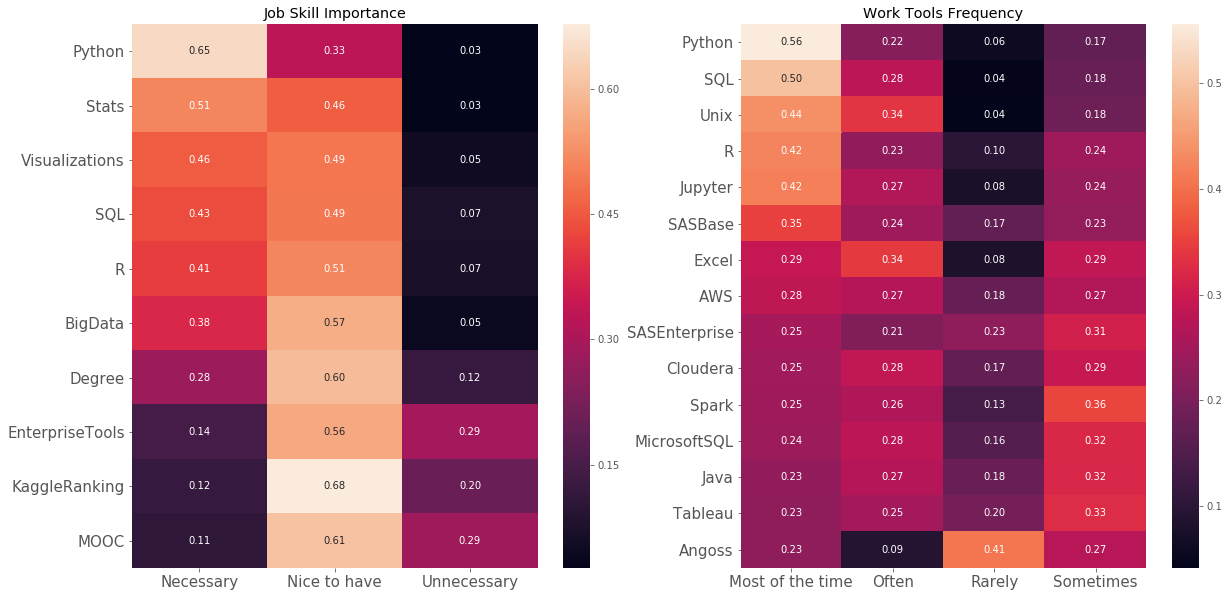

In [9]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

JS_importance = count_multi_col(df, 'JobSkillImportance', ['JobSkillImportanceOtherSelect1', 'JobSkillImportanceOtherSelect2', 'JobSkillImportanceOtherSelect3'])
JS_importance = JS_importance.sort_values('Necessary', ascending = False)
sns.heatmap(JS_importance, ax = ax[0], annot = True, fmt = ".2f")
ax[0].set_title('Job Skill Importance')
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 0, fontsize = 15)
ax[0].tick_params(axis = 'x', labelsize = 15)

WT_frequency = count_multi_col(df, 'WorkToolsFrequency', ['WorkToolsFrequencySelect1', 'WorkToolsFrequencySelect2'])
WT_frequency = WT_frequency.sort_values('Most of the time', ascending = False)
sns.heatmap(WT_frequency[:15], ax = ax[1], annot = True, fmt = ".2f")
ax[1].set_title('Work Tools Frequency')
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation = 0, fontsize = 15)
ax[1].tick_params(axis = 'x', labelsize = 15)

plt.show()

## Plot work challenges and time spent

Let's see which challenges is biggest and which work cost most of time.

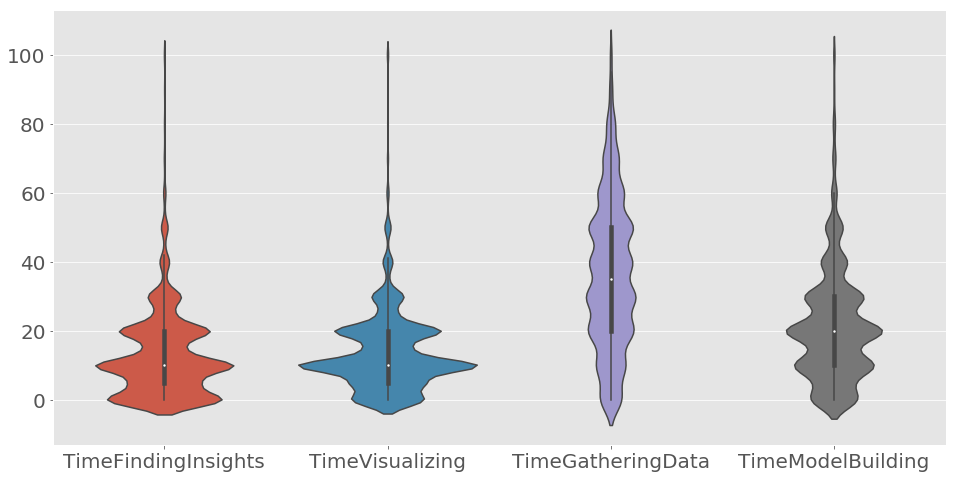

In [38]:
f, ax = plt.subplots(1, 1, figsize = (16, 8))

#learn_platform_plt = total_count(df['WorkChallengesSelect'])
#sns.barplot(learn_platform_plt[0], learn_platform_plt.index, ax = ax[0])
#ax[0].set_title('WorkChallengesSelect')

time_spent = ['TimeFindingInsights', 'TimeVisualizing', 'TimeGatheringData', 'TimeModelBuilding']
df_time_spent = df[time_spent].copy()
df_time_spent = df_time_spent[(df_time_spent > 100).sum(axis = 1) == 0]
sns.violinplot(data = df_time_spent, ax = ax)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

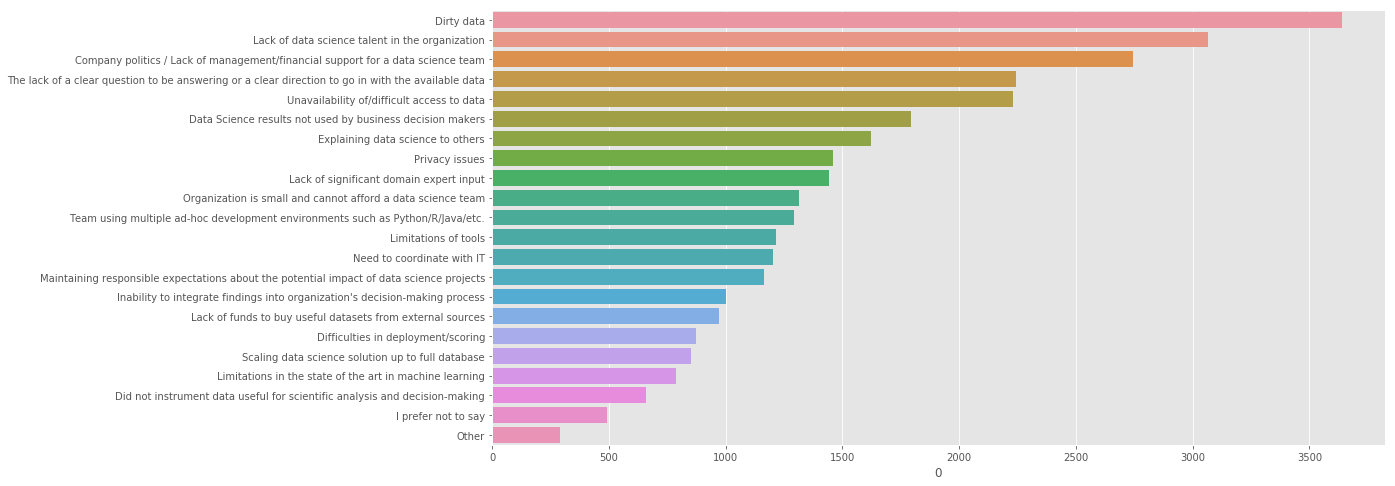

In [48]:
f, ax = plt.subplots(1, 1, figsize = (16, 8))
learn_platform_plt = total_count(df['WorkChallengesSelect'])
sns.barplot(learn_platform_plt[0], learn_platform_plt.index, ax = ax)
plt.show()

## Predict salary 

This model will predict whether the salary is above the median salary.

Clean the salary and transform it to numeric type. Then calculate dollar compensation through the exchange rate.

In [79]:
df_salary = df.copy()
df_salary['CompensationAmount'] = df_salary['CompensationAmount'].str.replace(',', '')
df_salary['CompensationAmount'] = df_salary['CompensationAmount'].str.replace('-', '')
df_salary = df_salary.merge(fx_rates, left_on = 'CompensationCurrency', right_on = 'originCountry', how = 'left')
df_salary['Salary'] = pd.to_numeric(df_salary['CompensationAmount']) * df_salary['exchangeRate']
df_salary.drop(['CompensationAmount', 'exchangeRate', 'Unnamed: 0'], axis =1, inplace = True)

Clean the job satisfaction and transform it to numeric type.

In [80]:
df_salary['JobSatisfaction'].replace({'10 - Highly Satisfied':'10', '1 - Highly Dissatisfied':'1','I prefer not to share': np.NaN},inplace = True)
df_salary['JobSatisfaction'] = df_salary['JobSatisfaction'].astype(float)

Select the demographic and numeric features.

In [81]:
dem_features = ['GenderSelect','Country','Age',
                'FormalEducation','MajorSelect','ParentsEducation',
                'EmploymentStatus', 'CurrentJobTitleSelect',
                'DataScienceIdentitySelect','CodeWriter',
                'JobFunctionSelect',
                'SalaryChange','RemoteWork','WorkMLTeamSeatSelect',
                'Tenure','EmployerIndustry','EmployerSize']
num_features = df_salary.select_dtypes(include=['float', 'int']).columns
df_num_dem = df_salary[list(set(num_features) | set(demographic_features))].copy()

Drop NA salary and fill other numeric NA.

In [84]:
df_num_dem = df_num_dem.dropna(axis = 0, subset = ['Salary'])
# Use median to fill nas
for col in num_features:
    df_num_dem.loc[:, col] = df_num_dem[col].fillna((df_num_dem[col].median()))

Use One-hot to recode the categorical features. 

In [ ]:
df_num_dem = pd.get_dummies(data = df_num_dem)

Prepare the data for modeling. 

In [85]:
X = df_num_dem.drop('Salary', axis=1)
y = df_num_dem['Salary']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Replace salary amount to whether salary is above the median.
y_median = y_train.median()
y_train = y_train > y_median
y_test = y_test > y_median

Use random forest to train and predict the salary sataus.

In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

The median is balance distributed so we can use accuracy as measures.

In [101]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8354661791590493

Plot the importance of the features.

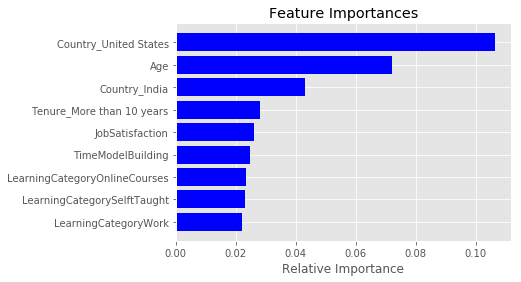

In [103]:
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices[-9:])), importances[indices[-9:]], color='b', align='center')
plt.yticks(range(len(indices[-9:])), features[indices[-9:]])
plt.xlabel('Relative Importance')
plt.show()

Use logistic regression to train and predict the salary again. We can see the result is similar.

In [107]:
from sklearn.linear_model import LogisticRegression
import operator

model = LogisticRegression(penalty = 'l1', C = 0.05, tol = 0.0001, random_state = 42, solver = 'liblinear')
model.fit(X_train,y_train)

# Use coefs as feature importance
coefs = np.transpose(model.coef_)

feature_importance={}
for (feature, k) in zip(list(X_train), range(len(coefs))) : 
    feature_importance[feature] = abs(coefs[k])
sorted_features = sorted(feature_importance.items(), key=operator.itemgetter(1))
top5 = sorted_features[-5::]
print(top5)

# Predit the salary and 
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

[('Country_United Kingdom', array([0.54814768])), ('Country_Germany', array([0.7042979])), ('EmployerIndustry_Academic', array([1.009369])), ('Country_India', array([1.43855345])), ('Country_United States', array([2.10467018]))]
0.8144424131627057
